## overall percentage of Correlation & Scatter Plot

Initial Data Preview:
         DATE  FIRECOUNT     WD     RH    WS  AT  CONST    GSDP      GSVA  \
0  01-09-2014          0  43.03  82.77  0.31 NaN      1  494803  434241.0   
1  02-09-2014          0  59.71  87.27  0.40 NaN      1  494803  434241.0   
2  03-09-2014          0  45.08  89.17  0.34 NaN      1  494803  434241.0   
3  04-09-2014          0  49.62  93.83  0.37 NaN      1  494803  434241.0   
4  05-09-2014          0  69.63  95.47  0.49 NaN      1  494803  434241.0   

   GSDP_CAP    HDI  PM10   NO2  PM25   SO2     CO  
0    272739  0.725   NaN  9.40   NaN  7.06  12.50  
1    272739  0.725   NaN  8.27   NaN  5.19  12.19  
2    272739  0.725   NaN  9.19   NaN  6.31  12.46  
3    272739  0.725   NaN  7.27   NaN  3.15  11.75  
4    272739  0.725   NaN  7.23   NaN  4.33  11.75  

Cleaned Data Preview:
   FIRECOUNT     WD     RH    WS   AT  CONST  PM10   NO2  PM25     CO   SO2  \
0          0  43.03  82.77  0.31  0.0      1   0.0  9.40   0.0  12.50  7.06   
1          0  59.71  8

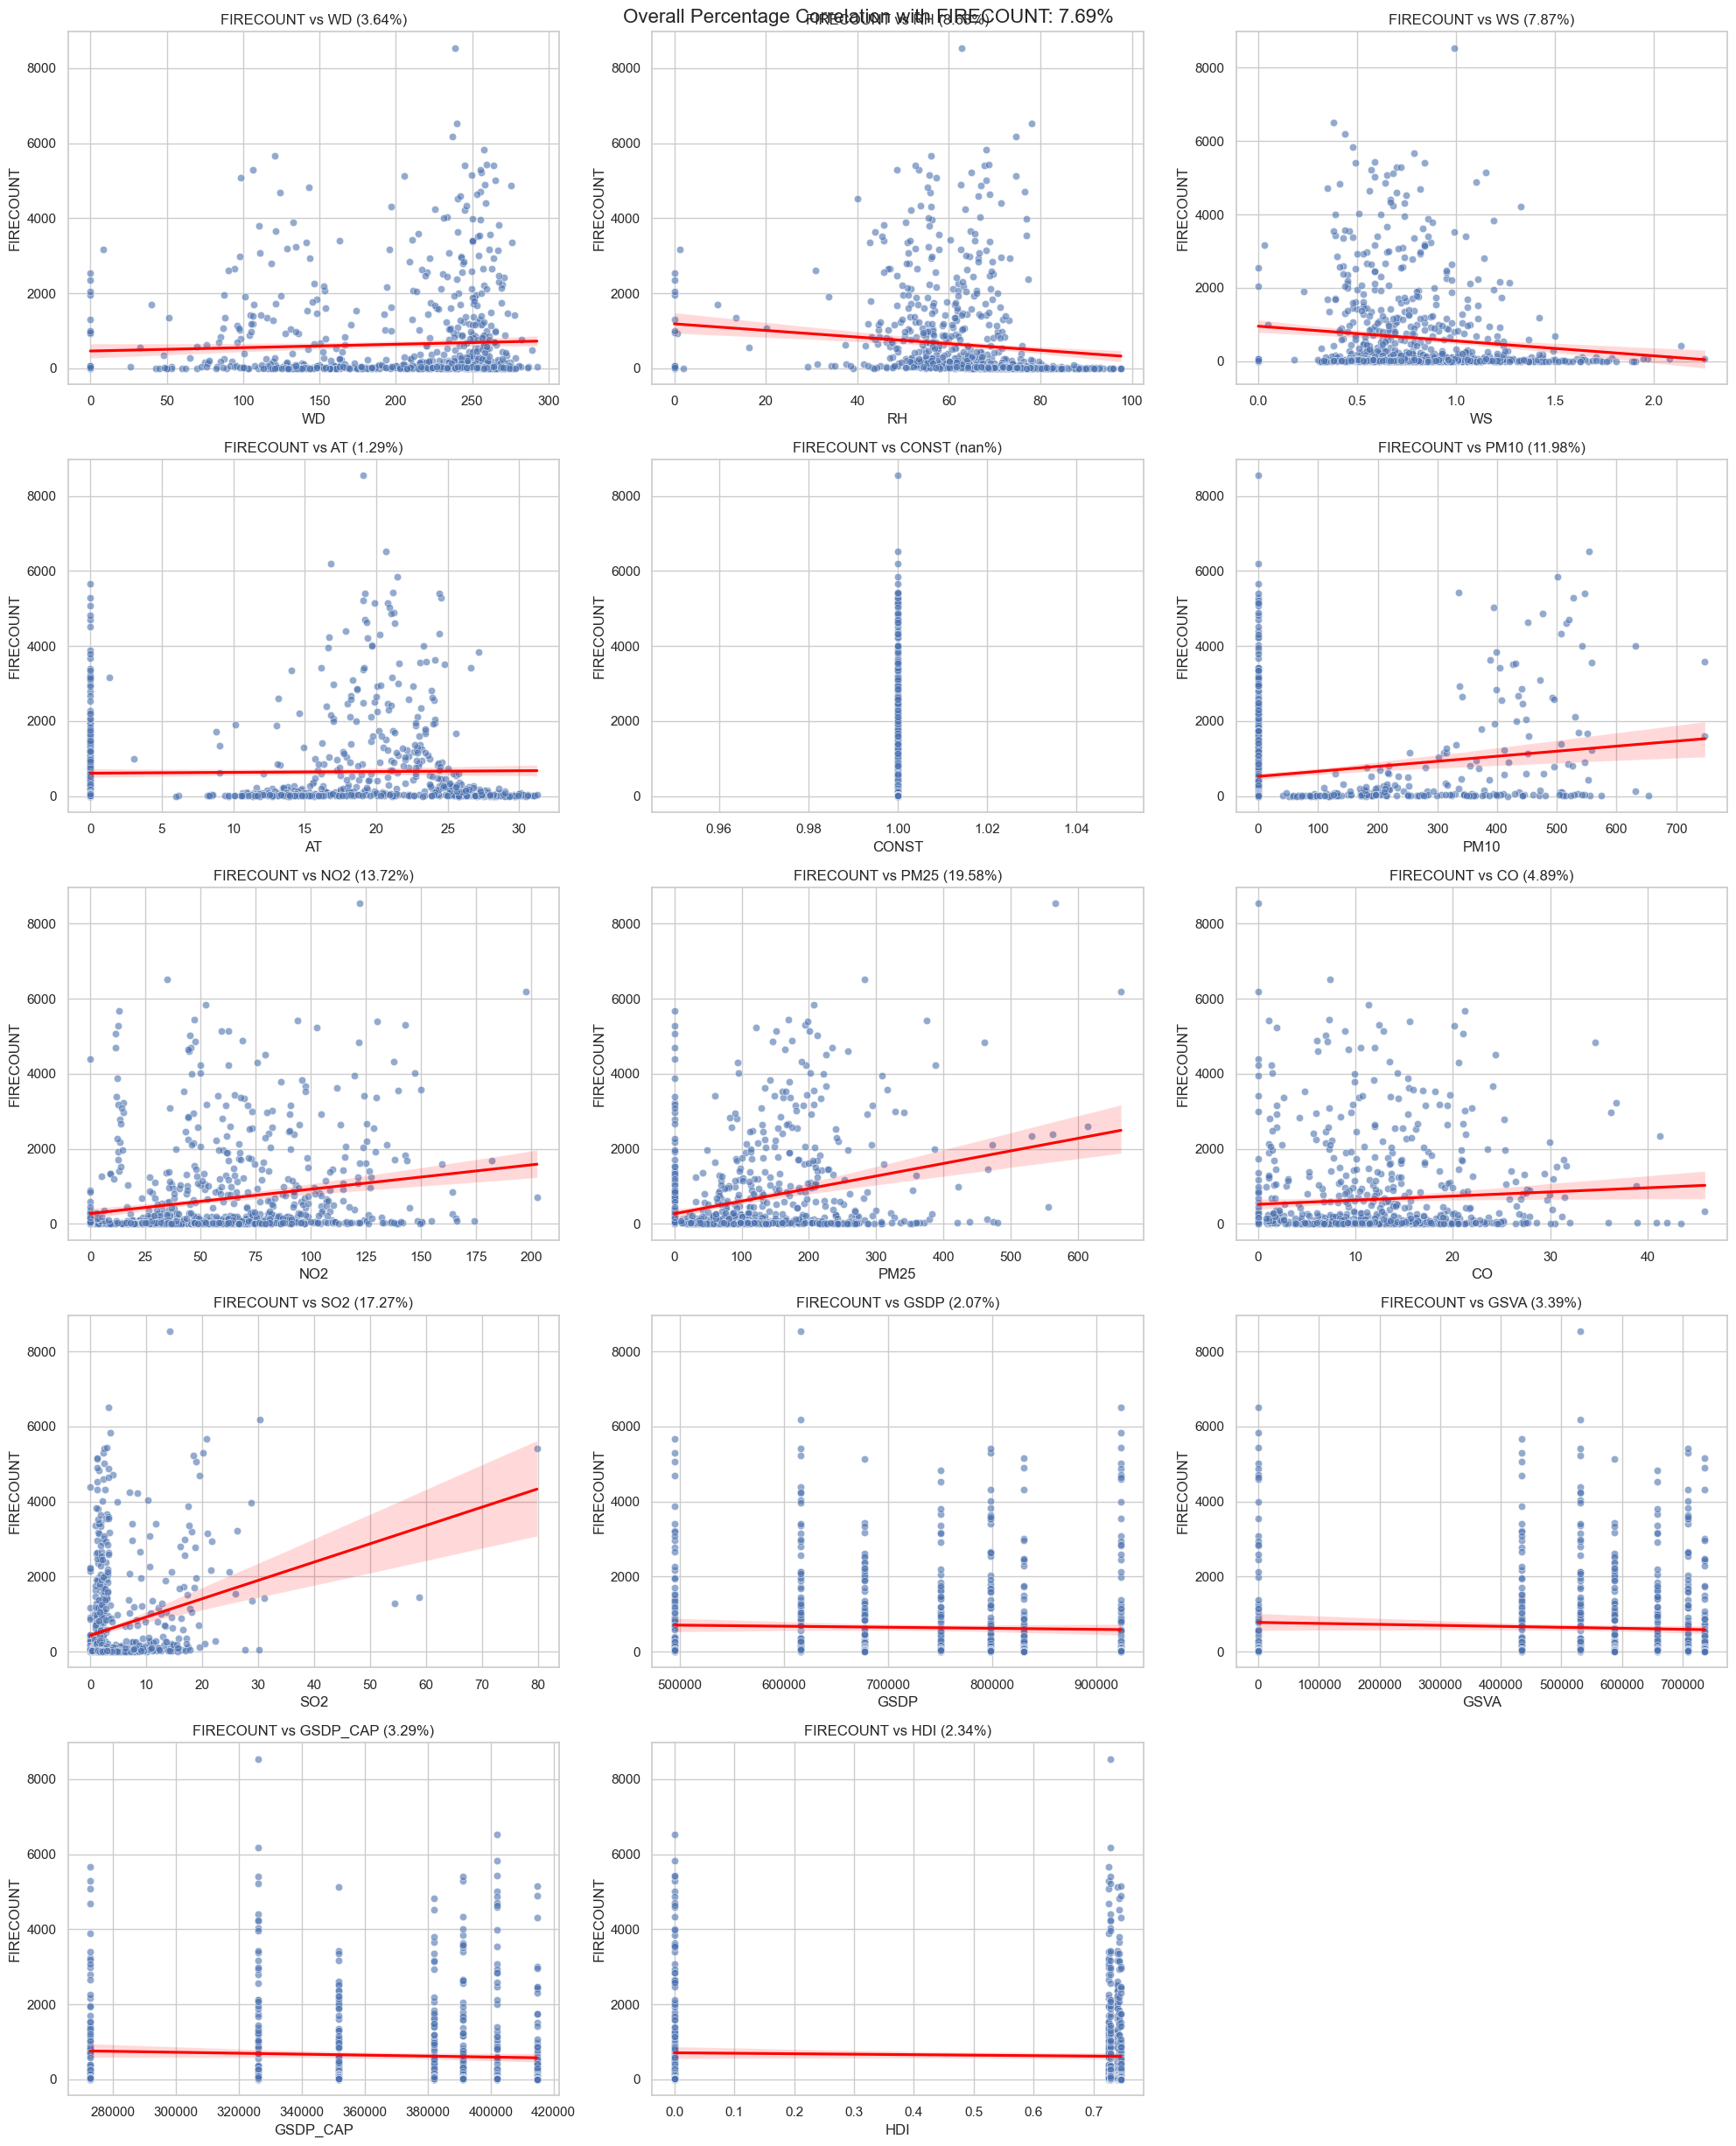

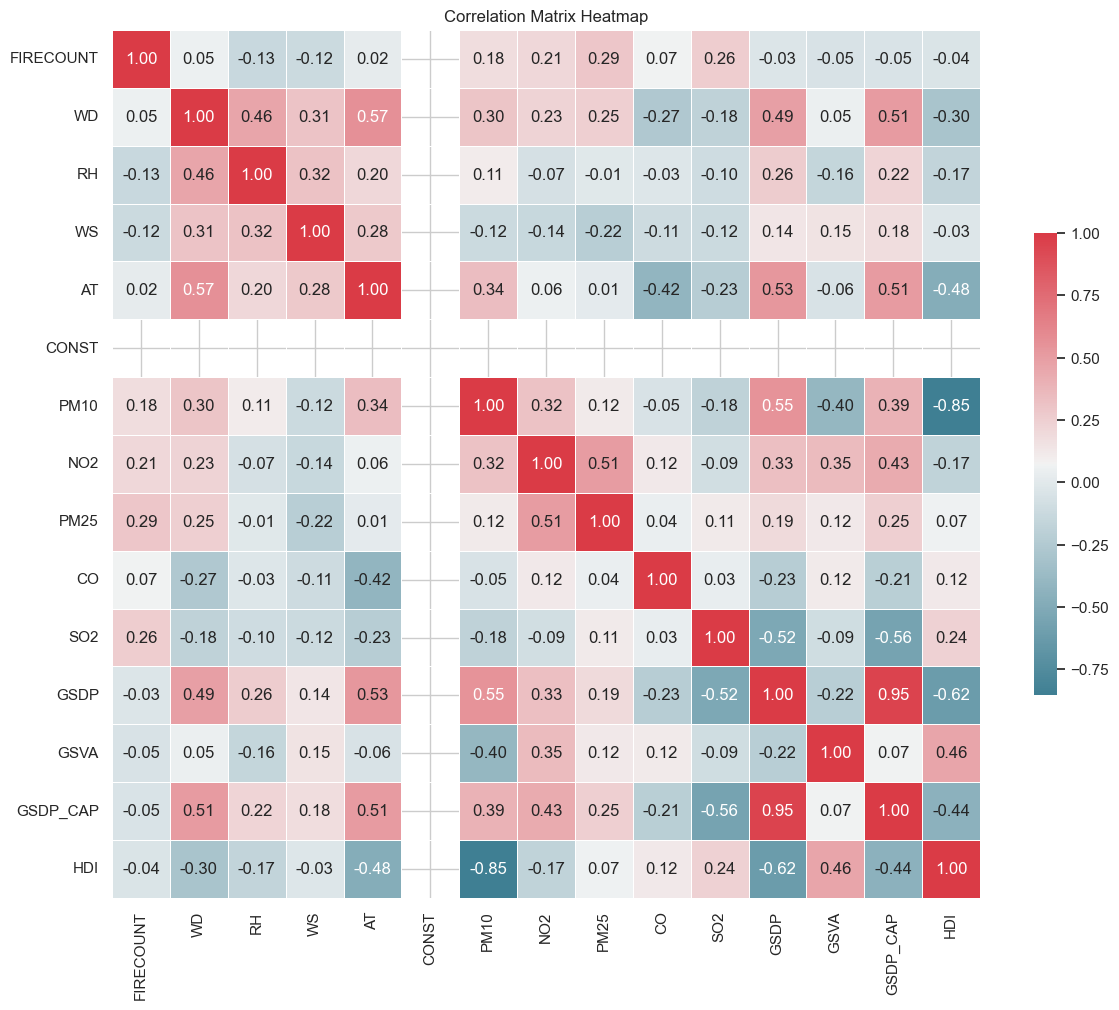

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path1 = r'D:\stubble buring\stubble\STN5.csv'  # Ensure the file path is correct
df1 = pd.read_csv(file_path1)

# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(df1.head())

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df1.columns:
    df1['DATE'] = pd.to_datetime(df1['DATE'], errors='coerce')  # Convert to datetime
    # Optionally, extract more date features if needed
    # df1['YEAR'] = df1['DATE'].dt.year
    # df1['MONTH'] = df1['DATE'].dt.month

# Define relevant columns
relevant_columns = ['FIRECOUNT','WD','RH','WS','AT',	'CONST','PM10',	'NO2','PM25','CO','SO2','GSDP',	'GSVA',	'GSDP_CAP','HDI']

# Ensure all relevant columns are present in the dataset
missing_columns = set(relevant_columns) - set(df1.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing in the dataset: {missing_columns}")

# Select only the relevant columns
df1_relevant = df1[relevant_columns]

# Step 3: Replace NaN values with zero
df1_cleaned = df1_relevant.fillna(0)

# Display the cleaned data
print("\nCleaned Data Preview:")
print(df1_cleaned.head())

# Step 4: Calculate the correlation between FIRECOUNT and other features
correlations = df1_cleaned.corr()['FIRECOUNT'].drop('FIRECOUNT')  # Exclude self-correlation
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print(correlations)

# Step 5: Calculate percentage contribution of each feature
total_abs_corr = correlations.abs().sum()
feature_percent_contributions = (correlations.abs() / total_abs_corr) * 100

# Step 6: Display the overall percentage correlation with FIRECOUNT
overall_percentage = feature_percent_contributions.mean()  # Calculate the mean of all contributions
print(f"\nOverall Percentage Correlation with FIRECOUNT: {overall_percentage:.2f}%")

# Display the percentage contribution of each feature
print("\nPercentage Contribution of Each Feature to Overall Correlation:")
print(feature_percent_contributions)

# Step 7: Scatter Plots with correlation percentages in the titles
sns.set(style="whitegrid")
features = correlations.index.tolist()  # List of features from the correlations

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

# Create scatter plots for each feature against FIRECOUNT
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df1_cleaned, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df1_cleaned, scatter=False, color='red')
    
    # Add correlation percentage to the plot title
    corr_percentage = feature_percent_contributions[feature]
    plt.title(f'FIRECOUNT vs {feature} ({corr_percentage:.2f}%)')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

# Add overall percentage correlation title at the top
plt.suptitle(f"Overall Percentage Correlation with FIRECOUNT: {overall_percentage:.2f}%", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Step 8: Generate a Correlation Matrix Heatmap
corr_matrix = df1_cleaned.corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()


Initial Data Preview:
         DATE  FIRECOUNT     WD     RH    WS  AT  CONST    GSDP      GSVA  \
0  01-09-2014          0  43.03  82.77  0.31 NaN      1  494803  434241.0   
1  02-09-2014          0  59.71  87.27  0.40 NaN      1  494803  434241.0   
2  03-09-2014          0  45.08  89.17  0.34 NaN      1  494803  434241.0   
3  04-09-2014          0  49.62  93.83  0.37 NaN      1  494803  434241.0   
4  05-09-2014          0  69.63  95.47  0.49 NaN      1  494803  434241.0   

   GSDP_CAP    HDI  PM10   NO2  PM25   SO2     CO  
0    272739  0.725   NaN  9.40   NaN  7.06  12.50  
1    272739  0.725   NaN  8.27   NaN  5.19  12.19  
2    272739  0.725   NaN  9.19   NaN  6.31  12.46  
3    272739  0.725   NaN  7.27   NaN  3.15  11.75  
4    272739  0.725   NaN  7.23   NaN  4.33  11.75  

Cleaned Data Preview:
     FIRECOUNT   WD   RH   WS   AT  CONST  PM10    NO2   PM25    CO   SO2  \
122          0  0.0  0.0  0.0  0.0      1   0.0  68.63  43.29  1.11  5.51   
123          1  0.0  0.0  

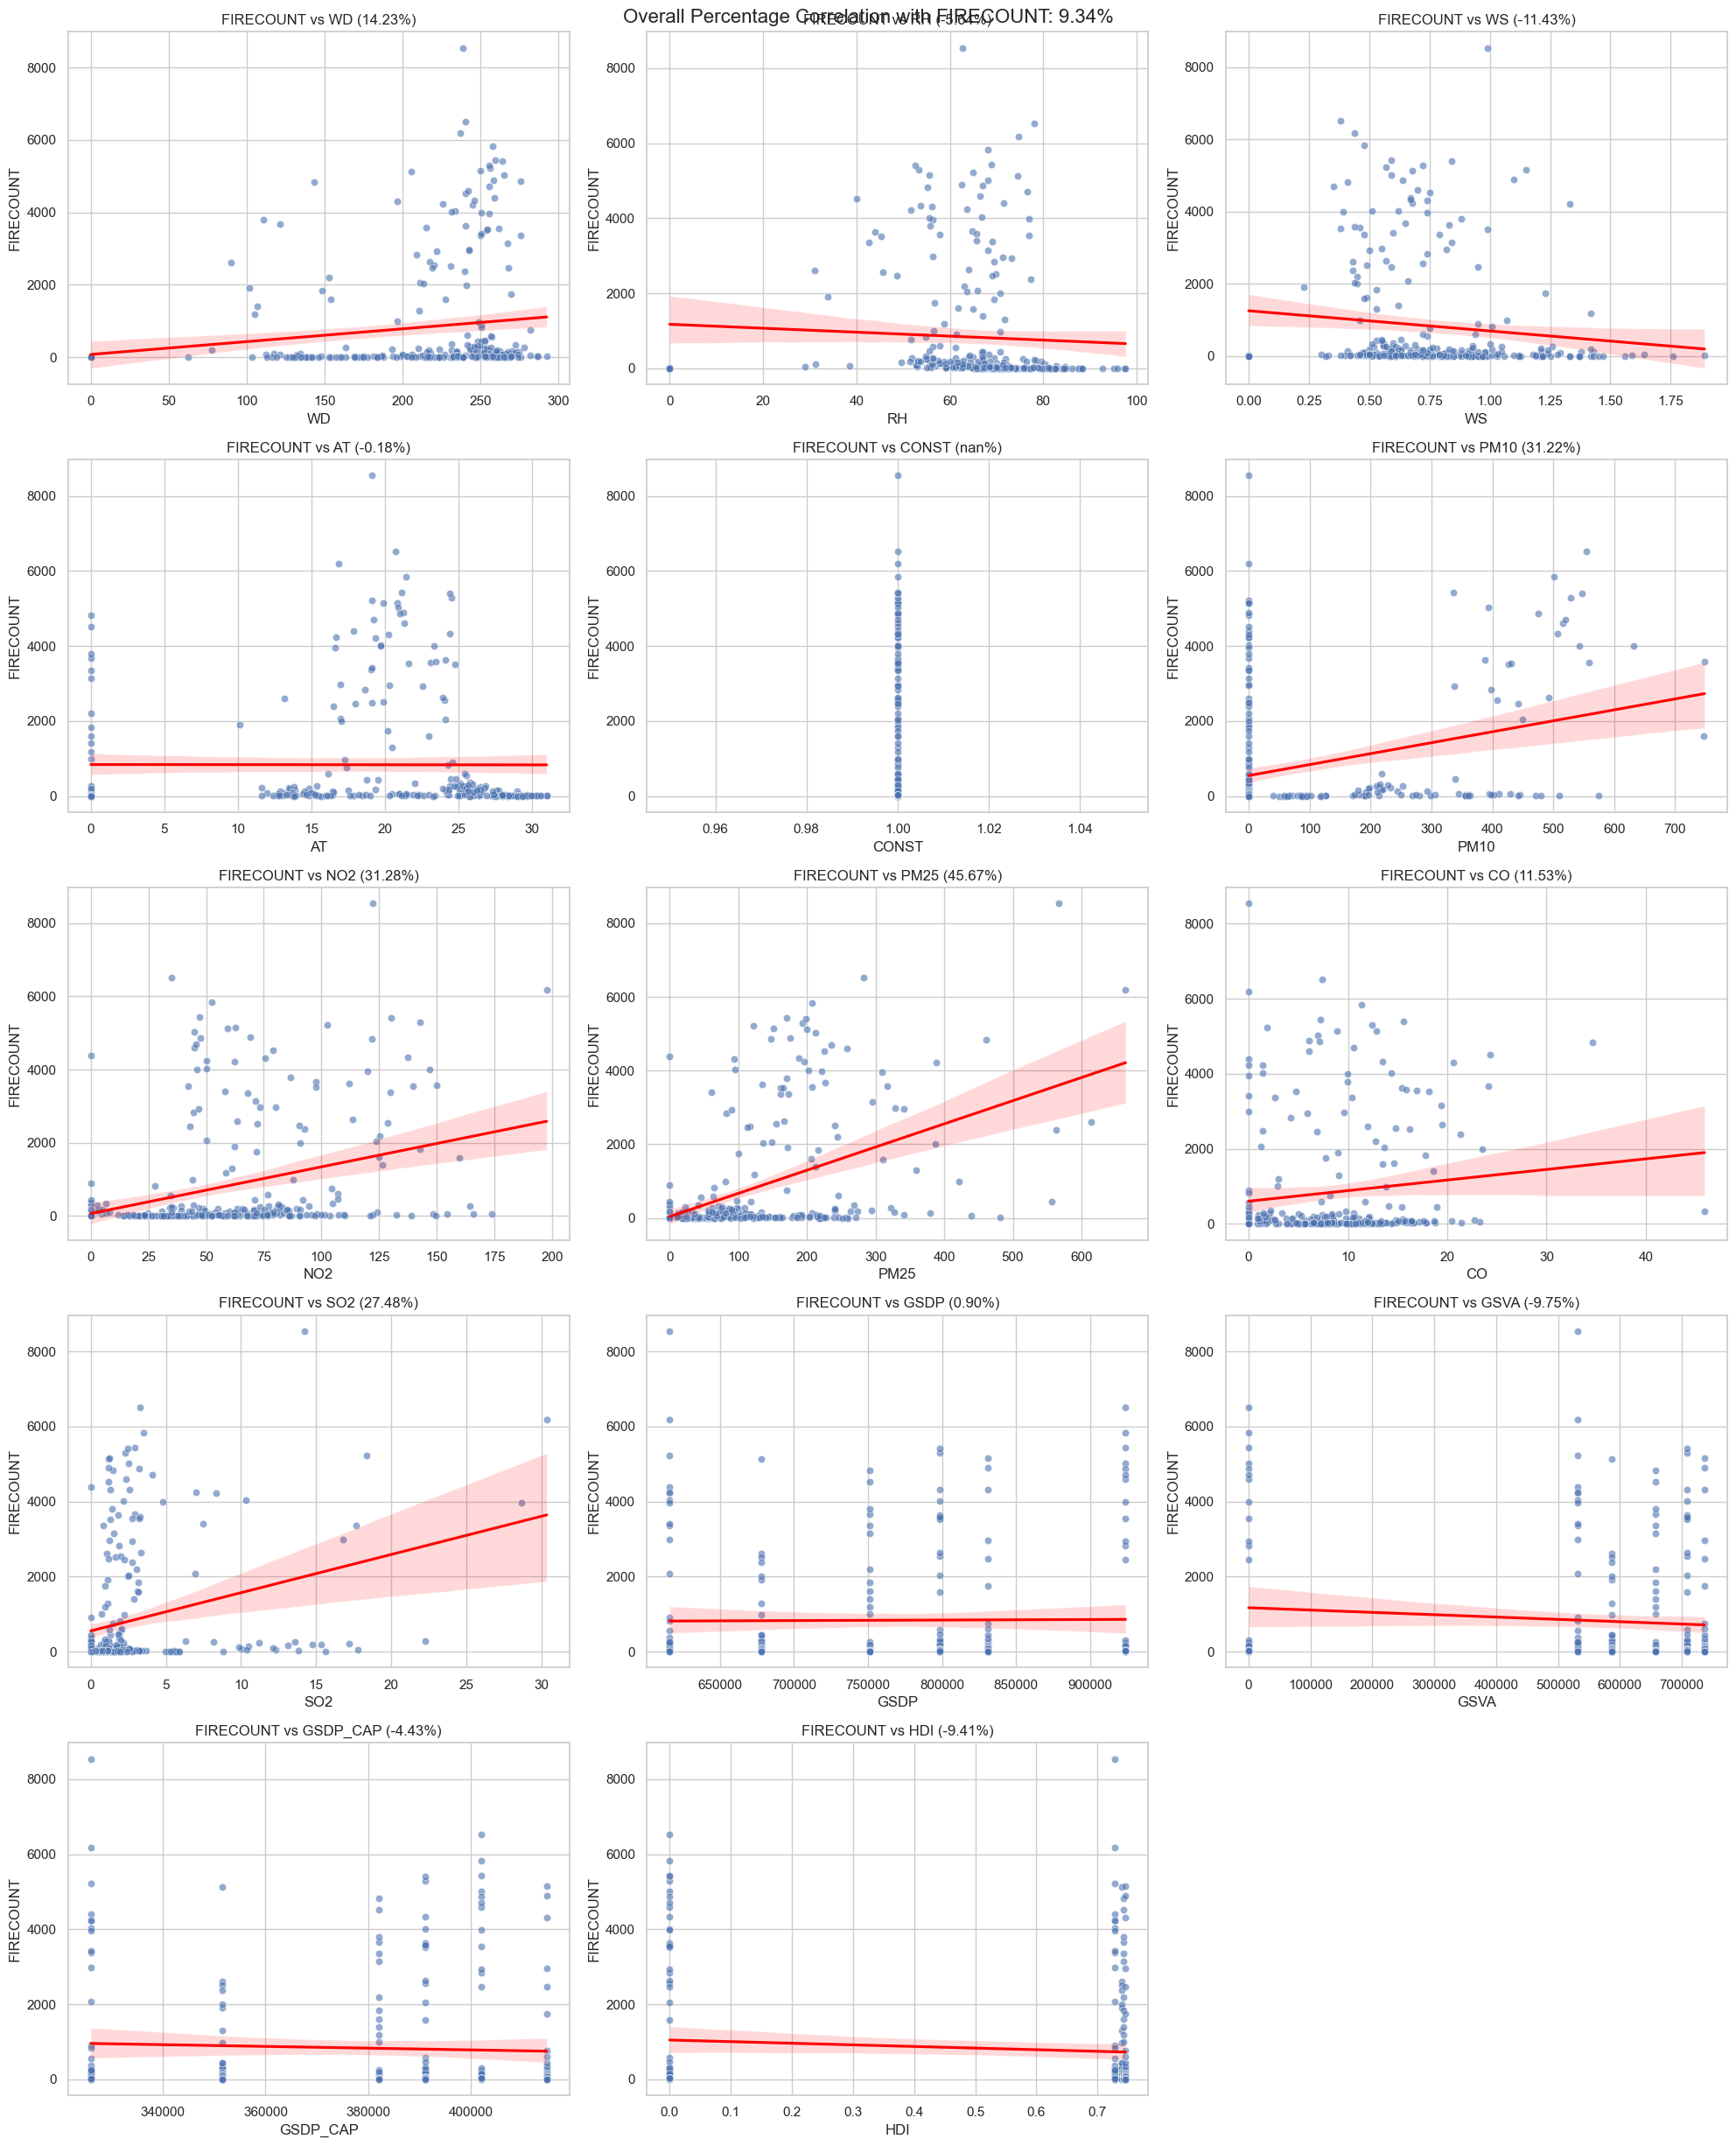

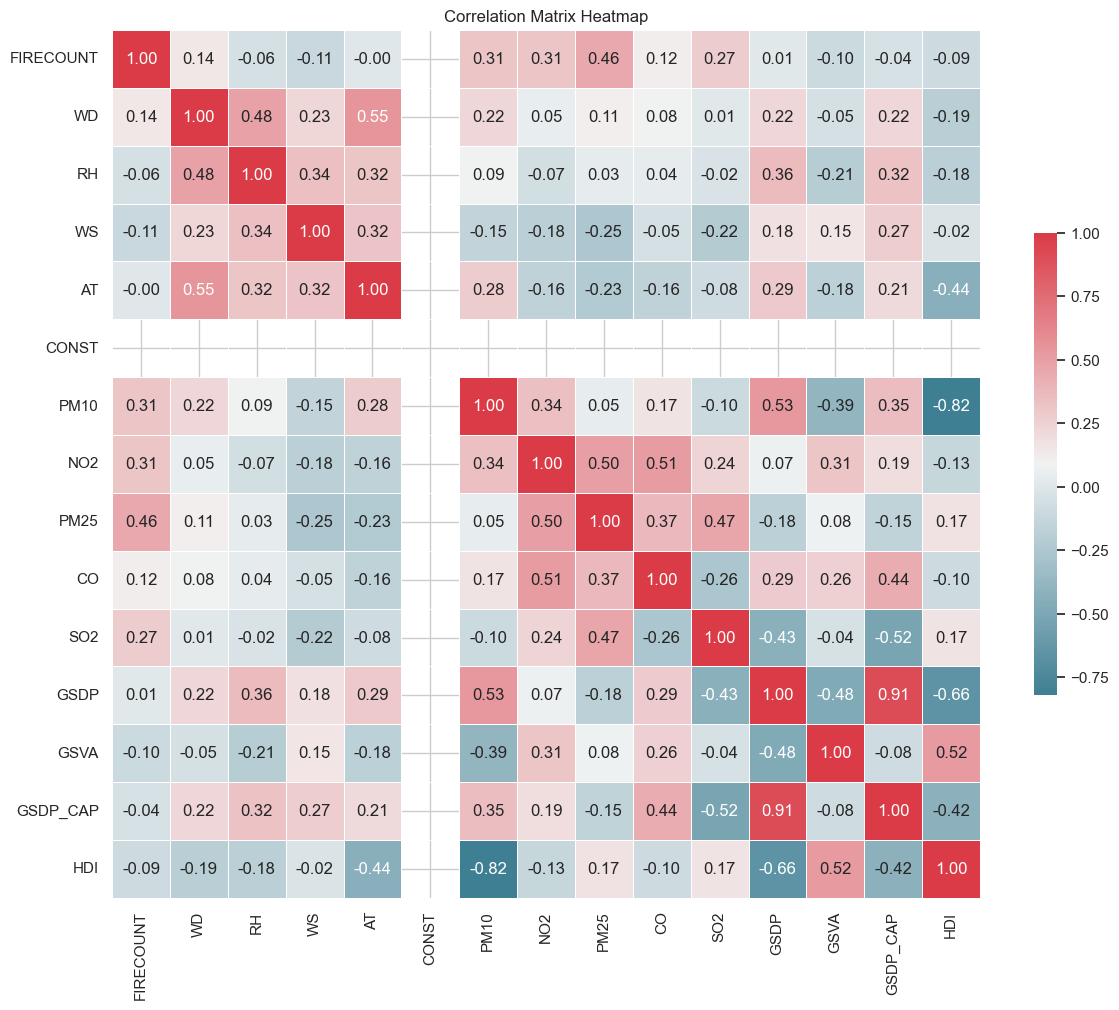

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path1 = r'D:\stubble buring\stubble\STN5.csv'  # Ensure the file path is correct
df1 = pd.read_csv(file_path1)

# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(df1.head())

# Step 2: Preprocess the data
# Convert 'DATE' column to datetime if present
if 'DATE' in df1.columns:
    df1['DATE'] = pd.to_datetime(df1['DATE'], errors='coerce')  # Convert to datetime

# Filter the data for the years 2016-2021
df1_filtered = df1[(df1['DATE'] >= '2016-01-01') & (df1['DATE'] <= '2021-12-31')]

# Define relevant columns
relevant_columns = ['FIRECOUNT','WD','RH','WS','AT','CONST','PM10',	'NO2','PM25','CO','SO2','GSDP',	'GSVA',	'GSDP_CAP','HDI']

# Ensure all relevant columns are present in the dataset
missing_columns = set(relevant_columns) - set(df1.columns)
if missing_columns:
    raise ValueError(f"The following required columns are missing in the dataset: {missing_columns}")

# Select only the relevant columns
df1_filtered_relevant = df1_filtered[relevant_columns]

# Step 3: Replace NaN values with zero
df1_cleaned = df1_filtered_relevant.fillna(0)

# Display the cleaned data
print("\nCleaned Data Preview:")
print(df1_cleaned.head())

# Step 4: Calculate the correlation between FIRECOUNT and other features
correlations = df1_cleaned.corr()['FIRECOUNT'].drop('FIRECOUNT')  # Exclude self-correlation
print("\nPearson Correlation Coefficients with FIRECOUNT:")
print(correlations)

# Step 5: Convert the correlations to percentage
percentage_correlations = correlations * 100
print("\nPercentage Correlation with FIRECOUNT:")
print(percentage_correlations)

# Step 6: Calculate the overall percentage correlation
overall_percentage = percentage_correlations.mean()
print(f"\nOverall Percentage Correlation with FIRECOUNT (2016-2021): {overall_percentage:.2f}%")

# Step 7: Scatter Plots with correlation percentages in the titles
sns.set(style="whitegrid")
features = correlations.index.tolist()  # Use only features correlated with FIRECOUNT

num_features = len(features)
cols = 3
rows = num_features // cols + int(num_features % cols > 0)

plt.figure(figsize=(20, 5 * rows))

# Create scatter plots for each feature against FIRECOUNT
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=feature, y='FIRECOUNT', data=df1_cleaned, alpha=0.6)
    sns.regplot(x=feature, y='FIRECOUNT', data=df1_cleaned, scatter=False, color='red')
    
    # Add correlation percentage to the plot title
    corr_percentage = percentage_correlations[feature]
    plt.title(f'FIRECOUNT vs {feature} ({corr_percentage:.2f}%)')
    plt.xlabel(feature)
    plt.ylabel('FIRECOUNT')

# Add overall percentage correlation title at the top
plt.suptitle(f"Overall Percentage Correlation with FIRECOUNT: {overall_percentage:.2f}%", fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Step 8: Generate a Correlation Matrix Heatmap
corr_matrix = df1_cleaned.corr()

plt.figure(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()
